# HEB 132 Final Project - Sex vs. Immigrant Opinion

## data creation

In [ ]:
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
from scipy.stats import chi2

In [ ]:
# custom entry from tweets 
lines = []
i = 0
# fill lines
while True:
    line = []
    line.append(i)
    line.append(input("Male? (1/0): "))
    line.append(input('Text: '))
    line.append(input('Pro immigrant?: '))
    line.append(input('Name: '))
    i += 1
    lines.append(line)
    if input("Continue? (y/n): ") == 'n':
        break
with open('data.csv', 'w') as f:
    writer = csv.writer(f)
    writer.writerows(lines)


In [ ]:
df = pd.read_csv('data.csv')

In [34]:
df['male'].value_counts()

1    74
0    22
Name: male, dtype: int64

In [ ]:
# verify sentiment analysis
from transformers import pipeline
sentiment_pipeline = pipeline("sentiment-analysis")

for row in df.iterrows():
    if row[1]['pro_immigrant'] == 1 and sentiment_pipeline(row[1]['text'])[0]['label'] == 'NEGATIVE' and sentiment_pipeline(row[1]['text'])[0]['score'] > 0.9:
        print(sentiment_pipeline(row[1]['text']))
        print(row[1]['text'])
    if row[1]['pro_immigrant'] == 0 and sentiment_pipeline(row[1]['text'])[0]['label'] == 'POSITIVE' and sentiment_pipeline(row[1]['text'])[0]['score'] > 0.9:
        print(sentiment_pipeline(row[1]['text']))
        print(row[1]['text'])

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
Device set to use mps:0


[{'label': 'NEGATIVE', 'score': 0.9905158281326294}]
Except that's not what trump will do. @HedyLamarr0629 • 15h Tariffs are what WE pay not other countries. Immigrants keep our food costs low & supply construction industry labor. Elon wants to gut veteran's benefits, SS, Medicare, Medicaid & SNAP & Republicans will do it & trump will sign it.
[{'label': 'NEGATIVE', 'score': 0.9988191723823547}]
When nativeborn Americans commit crimes, do you post that on your X account? Undocumented immigrants do not commit crime at any higher rate than native born Americans. This whole idea that the crime rate will go down in the US after a mass deportation is a joke.
[{'label': 'POSITIVE', 'score': 0.9165953993797302}]
The war in Ukraine is essentially "White depopulation" to make space for immigrants. 50 years from now, Americans will look at Russia and they will say that is how the West should have been.
[{'label': 'NEGATIVE', 'score': 0.9967527985572815}]
who has cut child healthcare? who blames 

The above sentiment analysis shows us that it is perhaps not quite possible to objectively determine opinion of immigrants based on the sentiment of the text. These tweets largely exist in an argumentative context, and the sentiment of the text can be quite negative even if the position is to defend immigrants, as it could be attacking the one it responds to. Similarly, many individuals are deeply enthusiastic about deporting immigrants, and their sentiment can be quite positive, despite the fact that they are expressing a negative opinion, even with hateful language.

## Data Analysis

### See difference between men vs. women

{0: 56, 1: 18}
{1: 14, 0: 8}


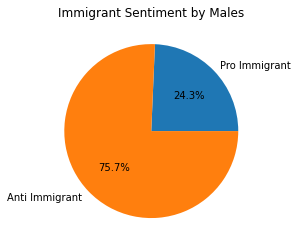

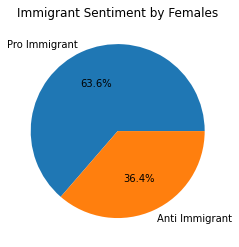

In [36]:
df_male = df[df['male'] == 1]
df_female = df[df['male'] == 0]

maleCounts = dict(df_male['pro_immigrant'].value_counts())
femaleCounts = dict(df_female['pro_immigrant'].value_counts())

print(maleCounts)
print(femaleCounts)

# plot pro_immigrant vs sex

fig, ax = plt.subplots()
ax.pie([maleCounts[1], maleCounts[0]], labels=['Pro Immigrant', 'Anti Immigrant'], autopct='%1.1f%%')
plt.title('Immigrant Sentiment by Males')
fig.patch.set_facecolor('white')
plt.show()

fig, ax = plt.subplots()
ax.pie([femaleCounts[1], femaleCounts[0]], labels=['Pro Immigrant', 'Anti Immigrant'], autopct='%1.1f%%')
plt.title('Immigrant Sentiment by Females')
fig.patch.set_facecolor('white')
plt.show()


It seems clear that the women in this sample are more likely to hold pro-immigrant views than men. We now test if this is statistically significant using Pearsone's Chi-Squared test.

In [35]:
contigencyTable = pd.crosstab(df['male'], df['pro_immigrant'])
stat, p, dof, expected = chi2_contingency(contigencyTable)

print(f"p value is {p}")
print(f"stat is {stat}")
print(f"degrees of freedom is {dof}")
print(f"expected is {expected}")

# fisher exact test 
from scipy.stats import fisher_exact

oddsratio, pvalue = fisher_exact(contigencyTable)
print(f"odds ratio is {oddsratio}")
print(f"p value is {pvalue}")



p value is 0.0014900257892781965
stat is 10.09090909090909
degrees of freedom is 1
expected is [[14.66666667  7.33333333]
 [49.33333333 24.66666667]]
odds ratio is 0.1836734693877551
p value is 0.0014560597631001473
